In [1]:

import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style


In [2]:
df=pd.read_csv(r"C:\Users\sruth\Downloads\cubic_zirconia.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [59]:
df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [61]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [62]:
df.duplicated().sum() 

40

In [63]:
df.median()

C:\Users\sruth\AppData\Local\Temp\ipykernel_10212\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


carat       0.70
cut         3.00
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [64]:
df = df.fillna(df.median())

C:\Users\sruth\AppData\Local\Temp\ipykernel_10212\3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [65]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [66]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 4    10816
3     6899
2     6030
1     2441
0      781
Name: cut, dtype: int64


color
 G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
 SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




In [67]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [68]:

df.shape

(26967, 10)

In [ ]:
#Analysing Numerical and Categorical data

In [105]:
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = df.select_dtypes(exclude=np.number).columns.to_list()

In [106]:
numerical_cols

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [107]:
numerical_cols

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

<AxesSubplot:>

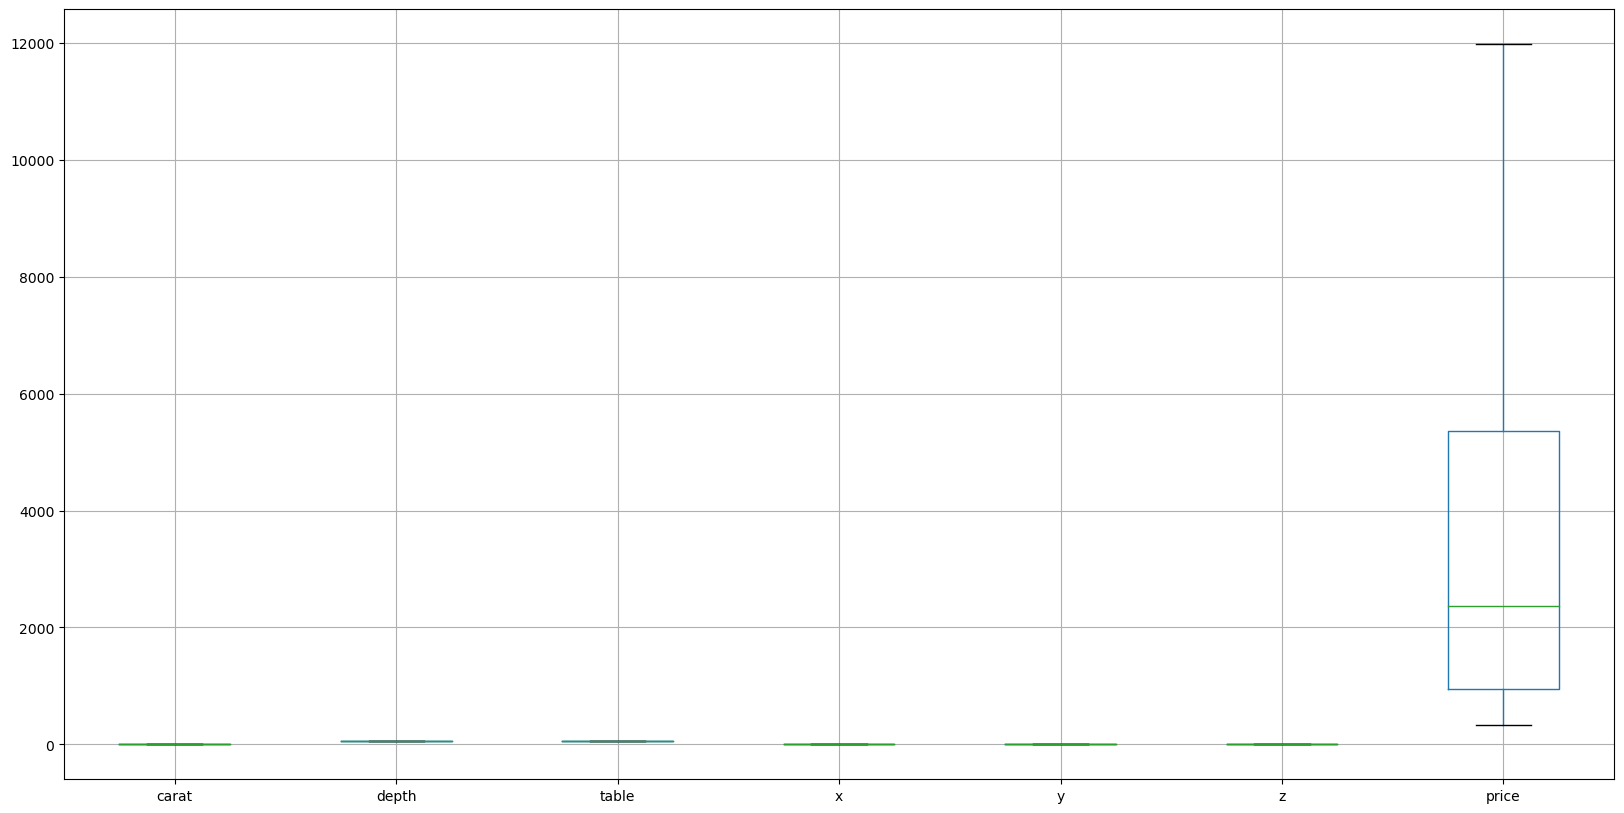

In [69]:
df.boxplot(figsize=(20,10))

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


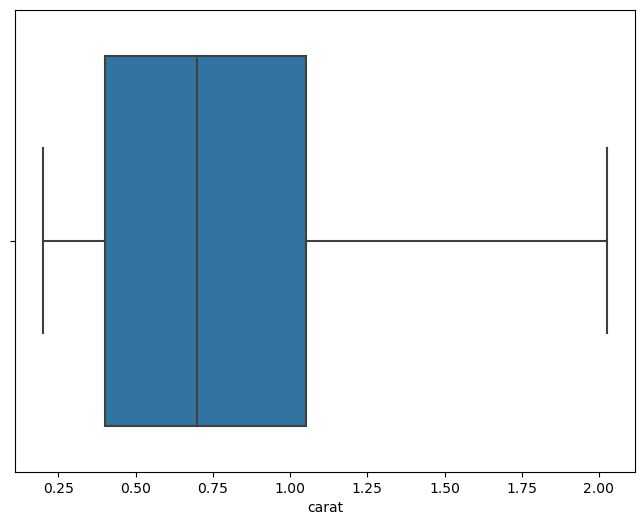

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


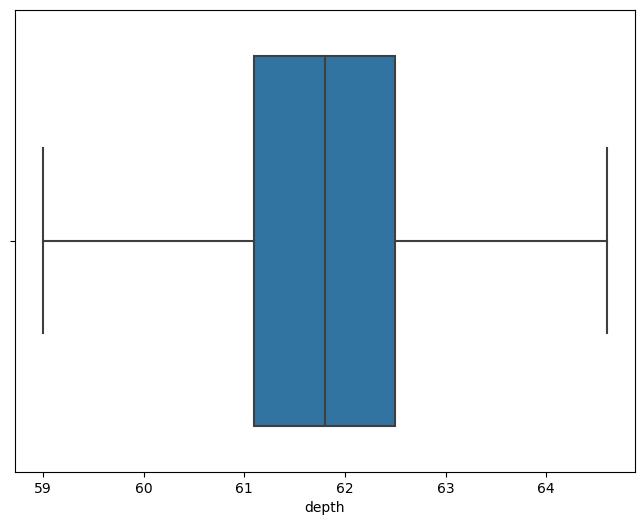

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


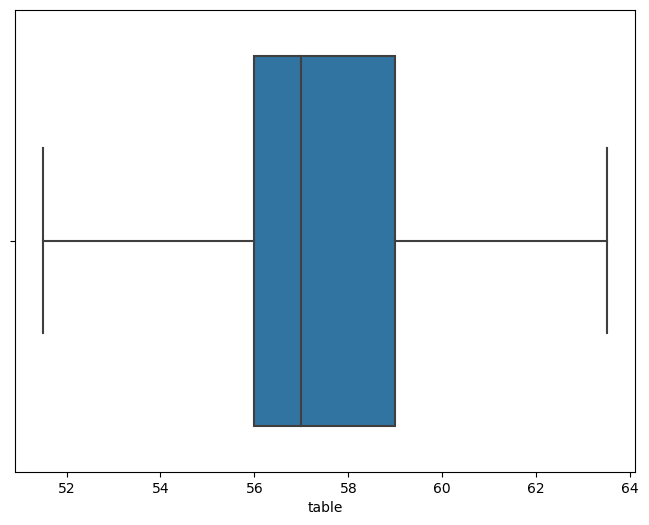

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


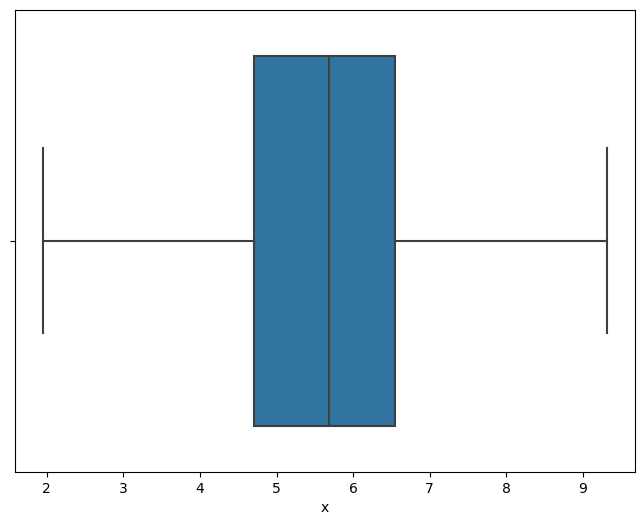

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


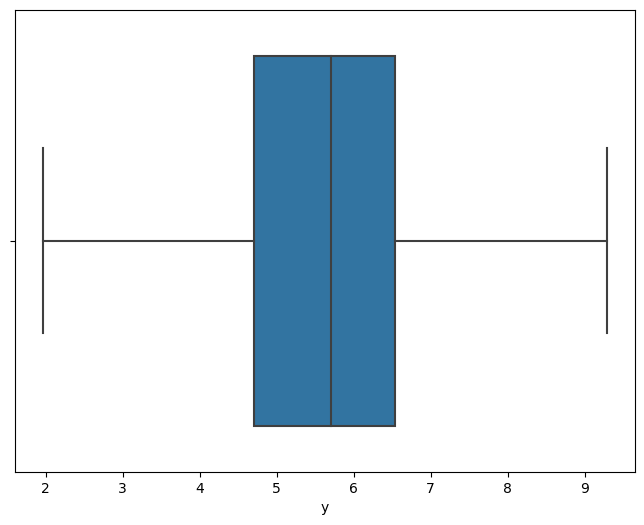

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


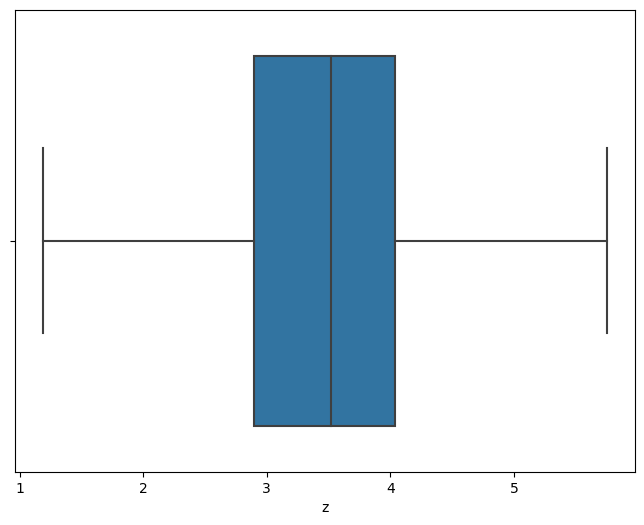

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


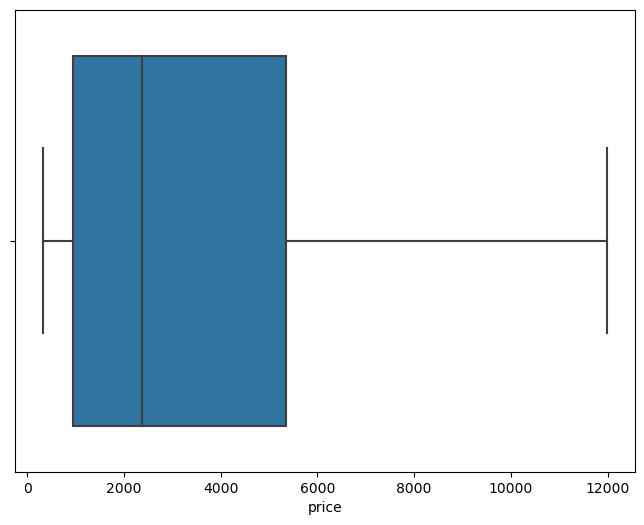

In [71]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [72]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [73]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


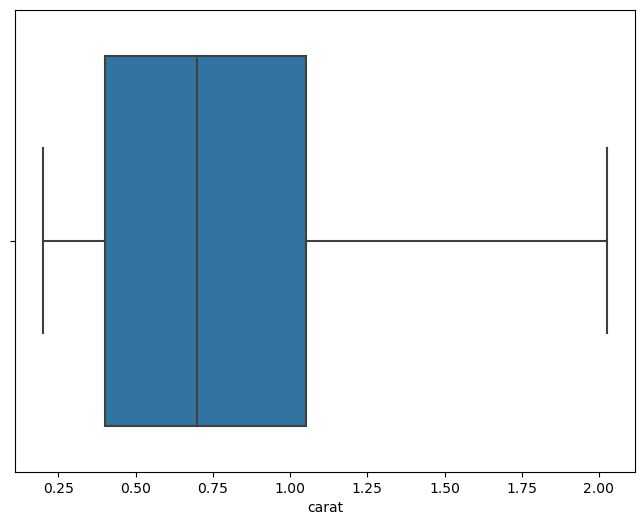

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


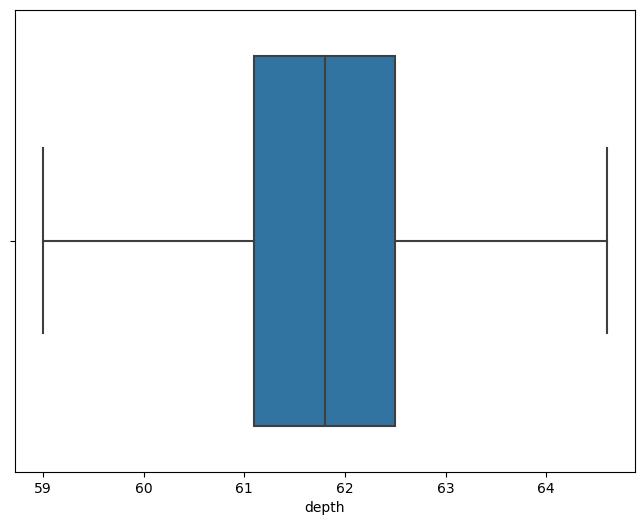

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


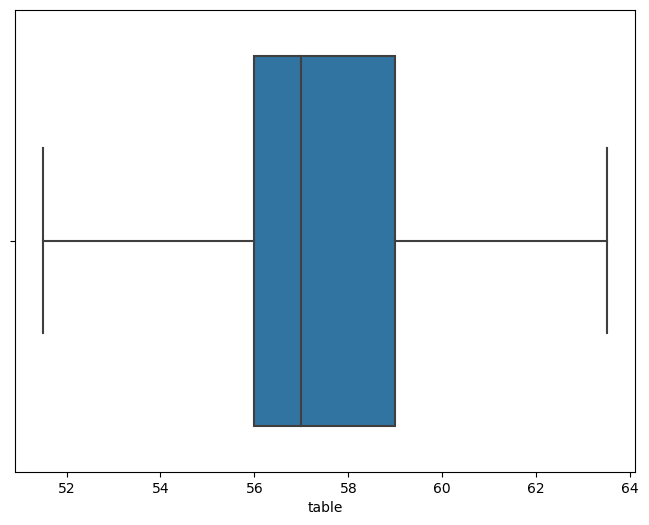

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


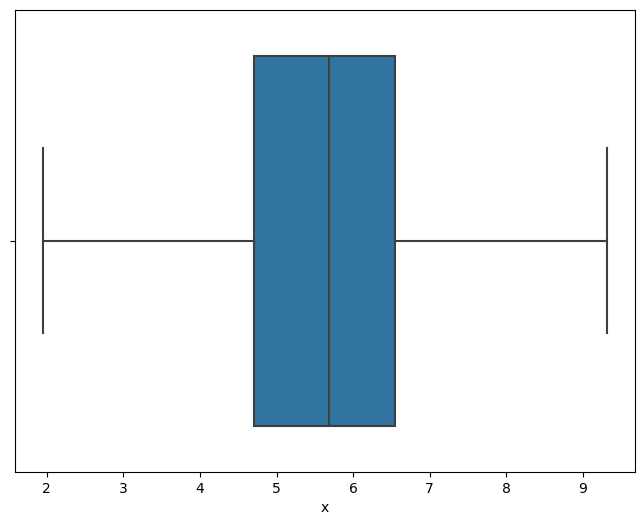

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


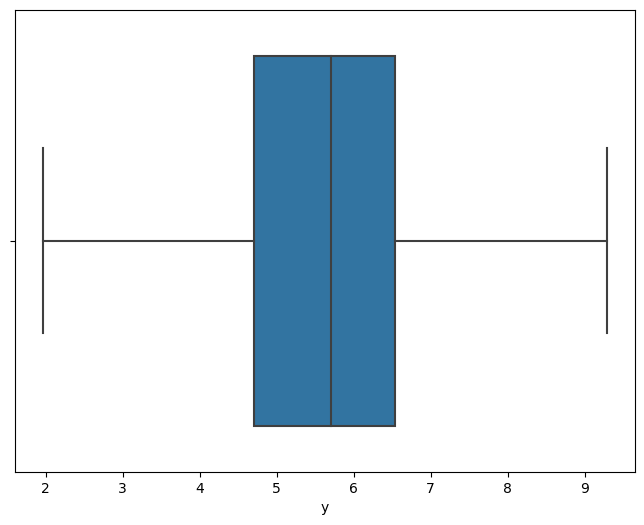

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


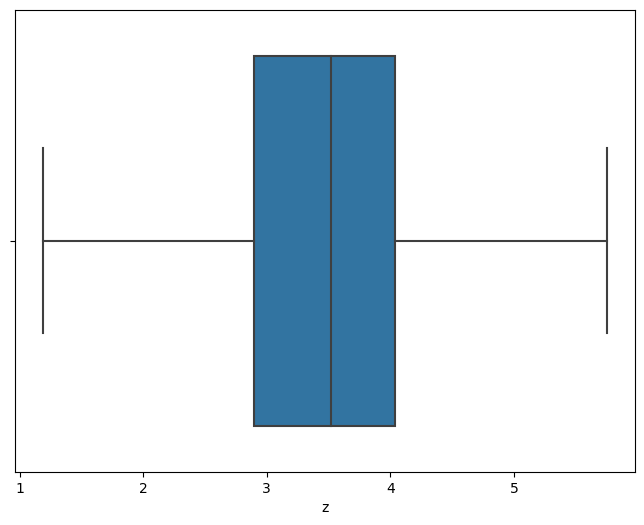

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


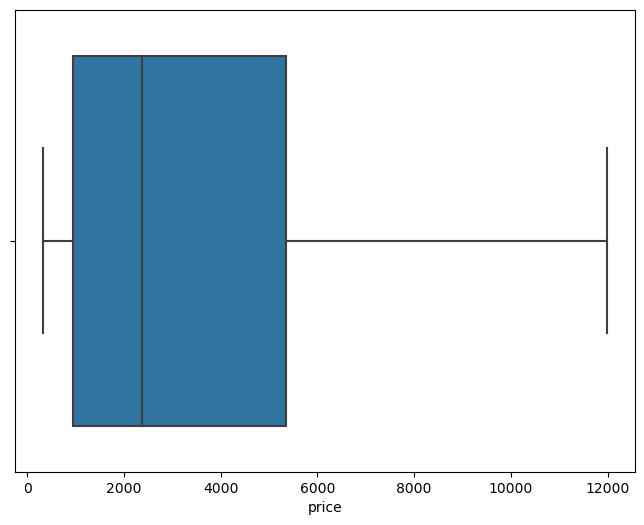

In [74]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [75]:
cat_cols = [col for col in df.columns if
           df[col].dtype == "object"]
cat_cols

['cut', 'color', 'clarity']

<AxesSubplot:xlabel='cut', ylabel='count'>

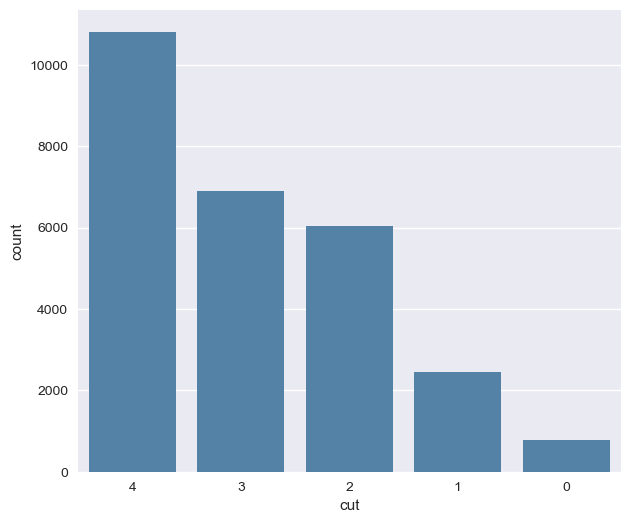

In [76]:
plt.style.use('seaborn')
plt.figure(figsize = (7,6))

sns.countplot(x = 'cut', data = df, color = 'steelblue')

In [77]:
#calculate color contribution of each of the colors in percentage

color = pd.DataFrame(df['color'].value_counts())
color = color.reset_index()
color = color.rename(columns = {'index':'color', 'color':'count'})

for cl in color.color:
    color['perc'] = (color['count'] / df.shape[0] )*100

In [79]:
#calculate clarity contribution of each of the clarity type in percentage

Clarity = pd.DataFrame(df['clarity'].value_counts())
Clarity = Clarity.reset_index()
Clarity = Clarity.rename(columns = {'index':'clarity', 'clarity':'count'})

for cla in Clarity.clarity:
    Clarity['perc'] = (Clarity['count'] / df.shape[0] )*100

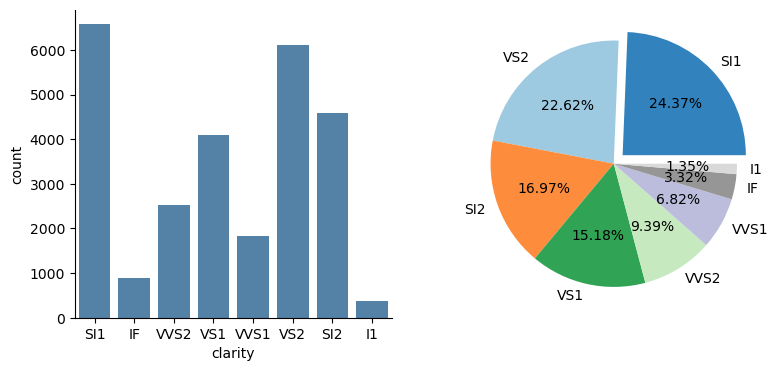

In [80]:
plt.figure(figsize = (9,4))
plt.style.use('default')

cmap=plt.get_cmap('tab20c')
clr=[cmap(i) for i in np.linspace(0,1,8)]
explode = [0.1,0,0,0,0,0,0,0]

plt.subplot(121)
sns.countplot(x = 'clarity', data = df, color = 'steelblue')
sns.despine()

plt.subplot(122)
pie = plt.pie(x = 'perc' , 
              labels = 'clarity' ,
              colors = clr,
              autopct = '%1.2f%%', 
              explode = explode,
              data = Clarity)

In [81]:
num_cols = [col for col in df.columns if
           df[col].dtype == 'int' or df[col].dtype == 'float']

In [83]:
df.skew()

C:\Users\sruth\AppData\Local\Temp\ipykernel_10212\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


carat    0.917096
cut     -0.718868
depth   -0.195192
table    0.480441
x        0.394470
y        0.390750
z        0.384198
price    1.158126
dtype: float64

In [84]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [85]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)

Description of carat
----------------------------------------------------------------------------
count    26967.000000
mean         0.793593
std          0.462431
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          2.025000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


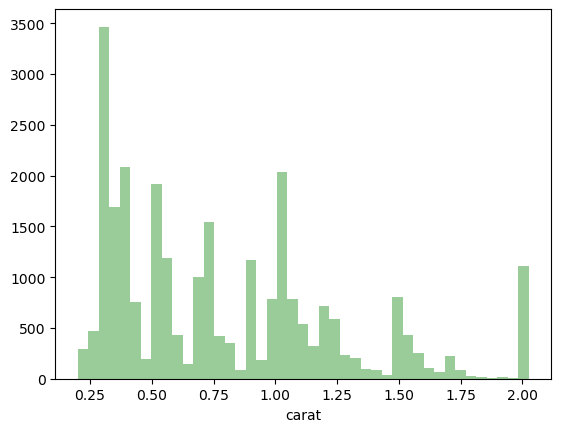

BoxPlot of carat
----------------------------------------------------------------------------


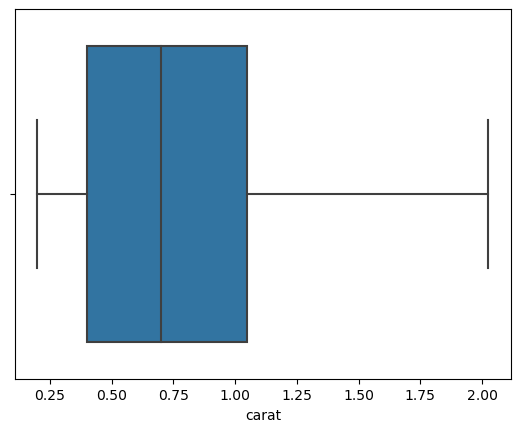

Description of depth
----------------------------------------------------------------------------
count    26967.000000
mean        61.750502
std          1.218929
min         59.000000
25%         61.100000
50%         61.800000
75%         62.500000
max         64.600000
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


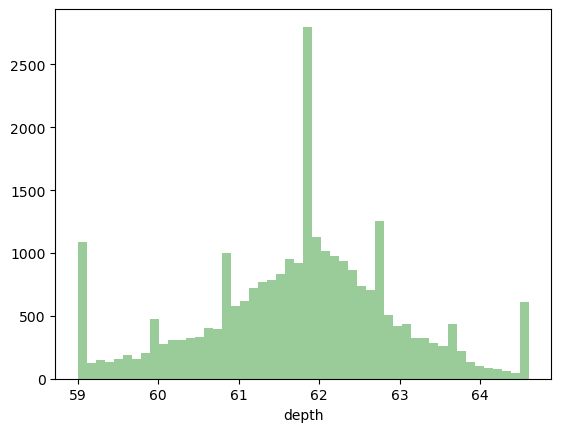

BoxPlot of depth
----------------------------------------------------------------------------


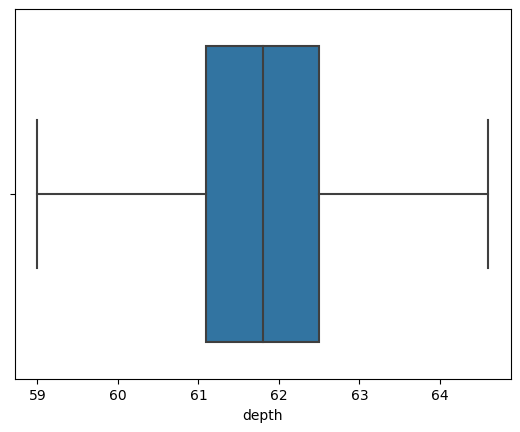

Description of table
----------------------------------------------------------------------------
count    26967.000000
mean        57.435699
std          2.157125
min         51.500000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


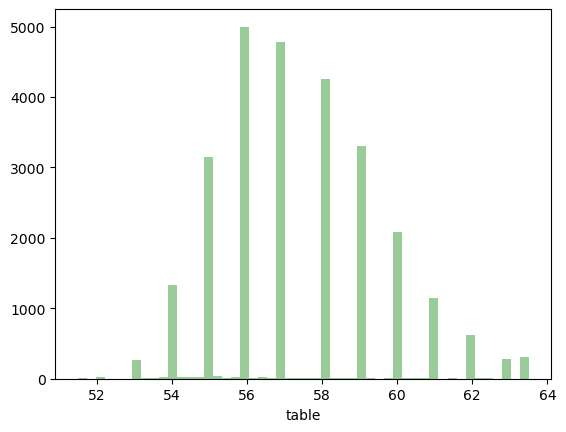

BoxPlot of table
----------------------------------------------------------------------------


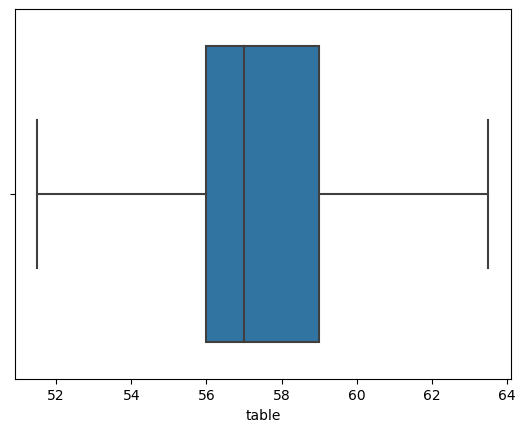

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of x
----------------------------------------------------------------------------
count    26967.000000
mean         5.729903
std          1.127023
min          1.950000
25%          4.710000
50%          5.690000
75%          6.550000
max          9.310000
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


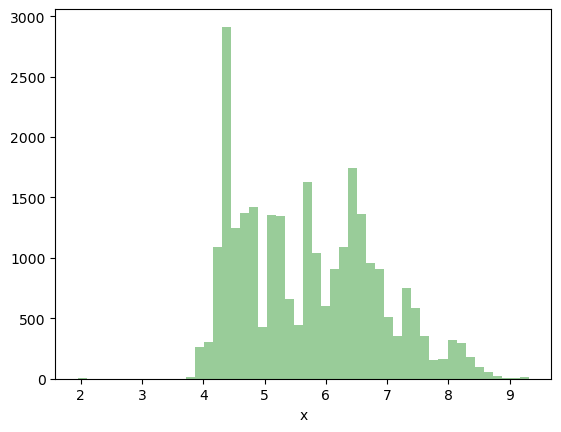

BoxPlot of x
----------------------------------------------------------------------------


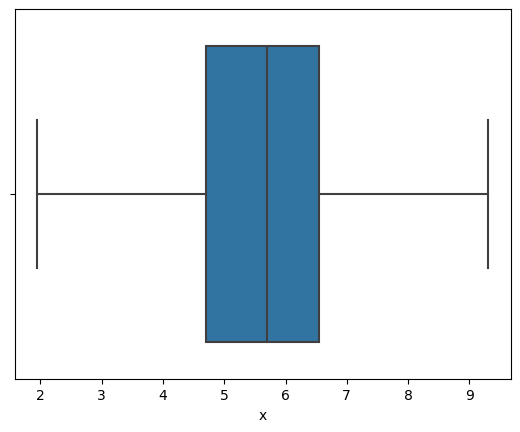

Description of y
----------------------------------------------------------------------------
count    26967.000000
mean         5.731798
std          1.118970
min          1.965000
25%          4.710000
50%          5.710000
75%          6.540000
max          9.285000
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


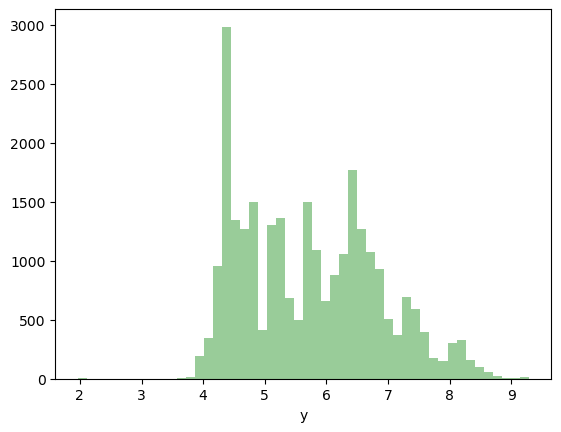

BoxPlot of y
----------------------------------------------------------------------------


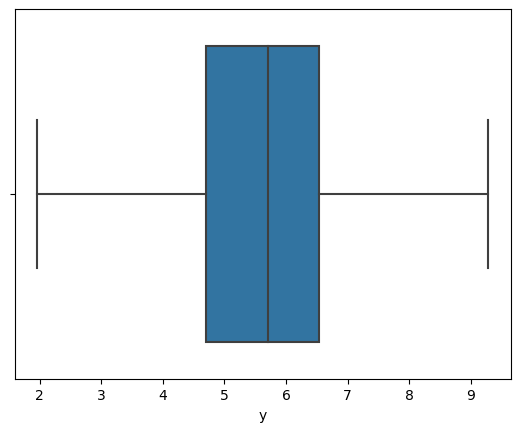

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of z
----------------------------------------------------------------------------
count    26967.000000
mean         3.537261
std          0.697278
min          1.190000
25%          2.900000
50%          3.520000
75%          4.040000
max          5.750000
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


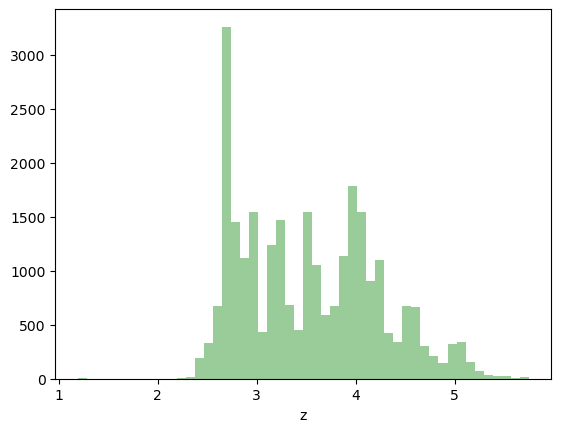

BoxPlot of z
----------------------------------------------------------------------------


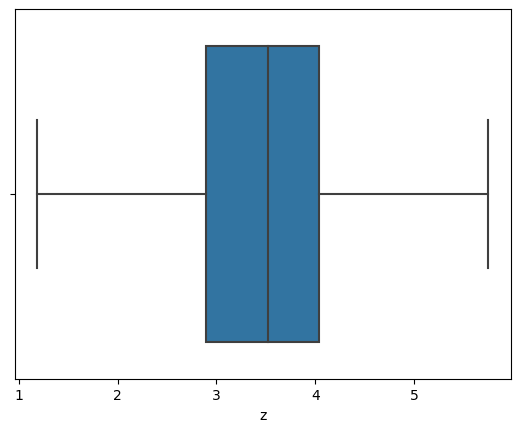

C:\Users\sruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of price
----------------------------------------------------------------------------
count    26967.000000
mean      3737.914136
std       3470.888236
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      11982.500000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


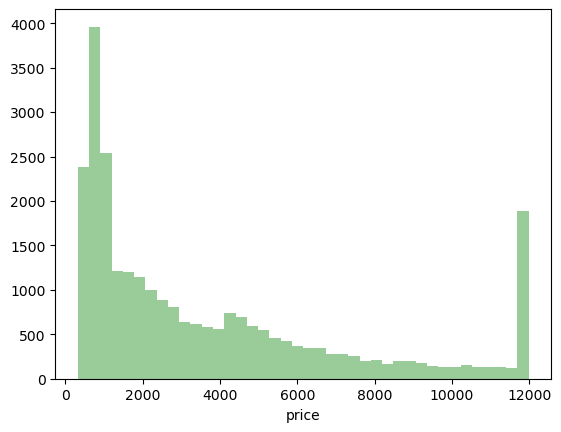

BoxPlot of price
----------------------------------------------------------------------------


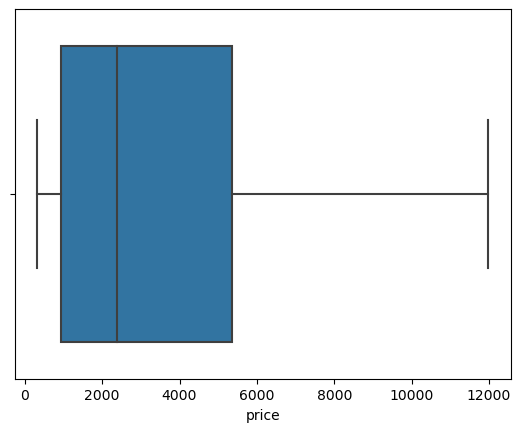

In [86]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [88]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029528,0.187395,0.982207,0.981285,0.977328,0.936741
depth,0.029528,1.000000,-0.289564,-0.019937,-0.022966,0.095160,-0.000789
table,0.187395,-0.289564,1.000000,0.199146,0.193530,0.159425,0.137971
x,0.982207,-0.019937,0.199146,1.000000,0.998495,0.988179,0.912759
y,0.981285,-0.022966,0.193530,0.998495,1.000000,0.987853,0.914191
z,0.977328,0.095160,0.159425,0.988179,0.987853,1.000000,0.905737
price,0.936741,-0.000789,0.137971,0.912759,0.914191,0.905737,1.000000


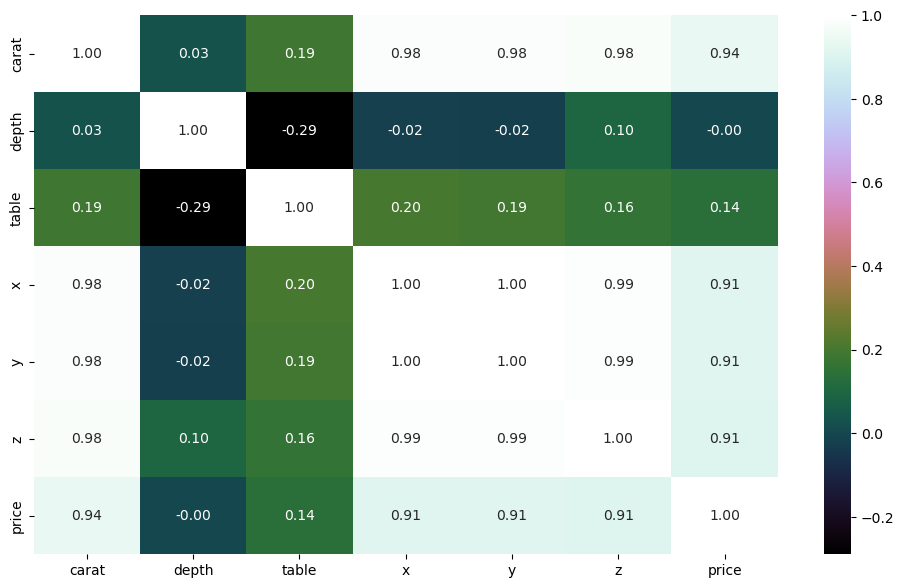

In [89]:
# Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='cubehelix')
plt.show()

In [90]:
#Checking the distribution

In [91]:
from pylab import rcParams

In [92]:
rcParams['figure.figsize'] = 8,6

In [93]:
l = ['carat','cut','color','clarity','depth','table','x','y','z','price']      
           


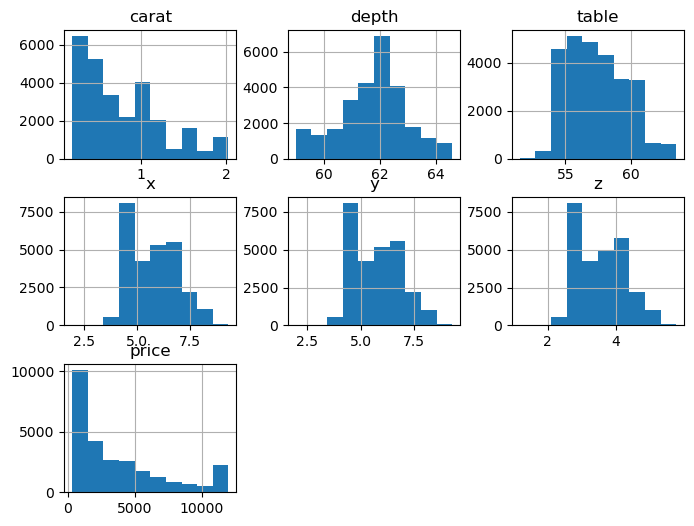

In [94]:
df[l].hist();

In [109]:
#Label Encoding categorical data

In [110]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [111]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [112]:
X = df.drop('price',axis=1)
Y = df['price']

In [113]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,2,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,4,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,4,2,6,60.4,59.0,4.35,4.43,2.65


In [114]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [115]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [117]:
# Let us explore the coefficients for each of the independent attributes

for i, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))

IndexError: invalid index to scalar variable.

In [118]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

IndexError: invalid index to scalar variable.